<a href="https://colab.research.google.com/github/saurabhmungale/DataScience_Assignements/blob/main/NLP_Introduction_and_Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Que.1.How can you perform word tokenization using NLTK

In [4]:

import nltk

# Download the necessary resource: 'punkt_tab'
nltk.download('punkt_tab')

# Sample text
text = "Natural Language Processing with NLTK is fun!"

# Word tokenization
words = nltk.word_tokenize(text)

# Print the tokenized words
print(words)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Natural', 'Language', 'Processing', 'with', 'NLTK', 'is', 'fun', '!']


Que.2.How can you perform sentence tokenization using NLTK:

In [5]:
import nltk
nltk.download('punkt')  # Download the necessary resources

# Sample text
text = "Natural Language Processing with NLTK is fun! Let's learn more about it. It is very powerful."

# Sentence tokenization
sentences = nltk.sent_tokenize(text)

# Print the tokenized sentences
print(sentences)


['Natural Language Processing with NLTK is fun!', "Let's learn more about it.", 'It is very powerful.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Que.3How can you remove stopwords from a sentence

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample sentence
sentence = "This is an example of removing stopwords from a sentence."

# Tokenize the sentence
words = word_tokenize(sentence)

# Get the list of stopwords in English
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokenized words
filtered_words = [word for word in words if word.lower() not in stop_words]

# Print the filtered sentence
print("Original sentence:", sentence)
print("Filtered sentence:", " ".join(filtered_words))


Original sentence: This is an example of removing stopwords from a sentence.
Filtered sentence: example removing stopwords sentence .


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Que.4.How can you perform stemming on a word

In [7]:
import nltk
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download('punkt')

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Sample word
word = "running"

# Perform stemming
stemmed_word = stemmer.stem(word)

# Print the result
print("Original word:", word)
print("Stemmed word:", stemmed_word)


Original word: running
Stemmed word: run


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Que.5.How can you perform lemmatization on a word

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Sample words
word1 = "running"
word2 = "better"

# Perform lemmatization (default is noun)
lemmatized_word1 = lemmatizer.lemmatize(word1, pos='v')  # Use verb for 'running'
lemmatized_word2 = lemmatizer.lemmatize(word2, pos='a')  # Use adjective for 'better'

# Print the result
print("Original word:", word1, "Lemmatized word:", lemmatized_word1)
print("Original word:", word2, "Lemmatized word:", lemmatized_word2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Original word: running Lemmatized word: run
Original word: better Lemmatized word: good


Que.6.How can you normalize a text by converting it to lowercase and removing punctuation?

In [9]:
import string

def normalize_text(text):
    # Convert the text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

# Sample text
sample_text = "Hello, World! This is an example text with Punctuation."

# Normalize the text
normalized_text = normalize_text(sample_text)

# Print the normalized text
print("Normalized text:", normalized_text)


Normalized text: hello world this is an example text with punctuation


Que.7.: How can you create a co-occurrence matrix for words in a corpus?

In [10]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
from collections import defaultdict

# Sample corpus (you can replace this with your own corpus)
corpus = [
    "I love programming in Python",
    "Python is great for data science",
    "Natural language processing is fun",
    "I enjoy learning new programming languages"
]

# Step 1: Tokenize the corpus into words
nltk.download('punkt')  # Download the punkt tokenizer
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Step 2: Define the co-occurrence matrix
window_size = 2  # Define the window size (how many words around the target word)
word_to_index = {}  # A dictionary to map words to indices
index_to_word = {}  # A dictionary to map indices to words
co_occurrence_matrix = defaultdict(lambda: defaultdict(int))  # Default dictionary to store counts

# Step 3: Create word-to-index mapping
all_words = set(word for sentence in tokenized_corpus for word in sentence)
for idx, word in enumerate(all_words):
    word_to_index[word] = idx
    index_to_word[idx] = word

# Step 4: Build the co-occurrence matrix
for sentence in tokenized_corpus:
    for i, target_word in enumerate(sentence):
        target_idx = word_to_index[target_word]
        # Create a window around the target word
        for j in range(i - window_size, i + window_size + 1):
            if j != i and 0 <= j < len(sentence):  # Ensure we're not looking at the target word itself
                context_word = sentence[j]
                context_idx = word_to_index[context_word]
                co_occurrence_matrix[target_idx][context_idx] += 1

# Step 5: Convert co-occurrence matrix to a DataFrame for better visualization
matrix = np.zeros((len(all_words), len(all_words)))

for target_idx, context_dict in co_occurrence_matrix.items():
    for context_idx, count in context_dict.items():
        matrix[target_idx, context_idx] = count

# Convert the matrix to a DataFrame for easier interpretation
co_occurrence_df = pd.DataFrame(matrix, index=index_to_word.values(), columns=index_to_word.values())

# Display the co-occurrence matrix
print(co_occurrence_df)


             python  love  great  learning  languages   in  science  data  \
python          0.0   0.0    1.0       0.0        0.0  1.0      0.0   0.0   
love            0.0   0.0    0.0       0.0        0.0  1.0      0.0   0.0   
great           1.0   0.0    0.0       0.0        0.0  0.0      0.0   1.0   
learning        0.0   0.0    0.0       0.0        0.0  0.0      0.0   0.0   
languages       0.0   0.0    0.0       0.0        0.0  0.0      0.0   0.0   
in              1.0   1.0    0.0       0.0        0.0  0.0      0.0   0.0   
science         0.0   0.0    0.0       0.0        0.0  0.0      0.0   1.0   
data            0.0   0.0    1.0       0.0        0.0  0.0      1.0   0.0   
natural         0.0   0.0    0.0       0.0        0.0  0.0      0.0   0.0   
enjoy           0.0   0.0    0.0       1.0        0.0  0.0      0.0   0.0   
fun             0.0   0.0    0.0       0.0        0.0  0.0      0.0   0.0   
programming     1.0   1.0    0.0       1.0        1.0  1.0      0.0   0.0   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


QUe.8.How can you apply a regular expression to extract all email addresses from a text

In [11]:
import re

# Sample text with email addresses
text = """
Hello, you can reach out to us at support@example.com for any queries.
For marketing inquiries, please contact marketing@company.org.
If you need technical support, email tech_support@domain.net.
"""

# Regex pattern for matching email addresses
email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'

# Extract all email addresses
email_addresses = re.findall(email_pattern, text)

# Print the extracted email addresses
print("Extracted email addresses:", email_addresses)


Extracted email addresses: ['support@example.com', 'marketing@company.org', 'tech_support@domain.net']


Que.9.How can you perform word embedding using Word2Vec

In [12]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Sample corpus (You can replace this with a larger corpus)
corpus = [
    "Natural language processing is a fascinating field.",
    "Word embeddings are used to represent words as vectors.",
    "Gensim is a popular library for topic modeling and word embeddings.",
    "Word2Vec can learn distributed representations of words."
]

# Step 1: Tokenize the sentences into words
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Step 2: Train the Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Access the learned word embeddings
word_embedding = model.wv['word']  # Get the embedding for the word 'word'
print("Word embedding for 'word':", word_embedding)

# Step 4: Find most similar words to 'word'
similar_words = model.wv.most_similar('word', topn=5)
print("Most similar words to 'word':", similar_words)


Word embedding for 'word': [-0.00713751  0.00124343 -0.0071764  -0.00224442  0.00372011  0.00583292
  0.00119966  0.00210471 -0.00411062  0.00722387 -0.00630524  0.00464605
 -0.00821988  0.00203652 -0.00497774 -0.00424876 -0.00310557  0.00565403
  0.00579677 -0.00497747  0.00077358 -0.00849554  0.00781029  0.00925664
 -0.00274389  0.00080062  0.00074581  0.00547876 -0.0086048   0.0005847
  0.00686808  0.00223012  0.00112445 -0.00932369  0.00848031 -0.00626413
 -0.00299095  0.00349254 -0.00077388  0.00141119  0.00178184 -0.0068285
 -0.00972335  0.00904175  0.00619852 -0.00691149  0.00340222  0.00020475
  0.00475312 -0.00711884  0.00402717  0.0043465   0.00995574 -0.00447458
 -0.00139096 -0.00731927 -0.00969522 -0.00907981 -0.00102273 -0.00650339
  0.00484869 -0.00616645  0.00252093  0.00073989 -0.00339255 -0.0009769
  0.00997936  0.00914645 -0.00446494  0.00908298 -0.00564232  0.00593249
 -0.003096    0.00343121  0.00301716  0.00689932 -0.00237205  0.00877738
  0.00758838 -0.00954736 -0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


QUe.10 How can you use Doc2Vec to embed documents

In [13]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Sample corpus (replace with your own corpus)
corpus = [
    "Natural language processing is a fascinating field.",
    "Doc2Vec learns distributed representations for entire documents.",
    "Document embeddings are useful for document similarity tasks.",
    "Doc2Vec is an extension of Word2Vec to represent entire documents."
]

# Step 1: Tokenize the sentences into words
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Step 2: Prepare the corpus for training (TaggedDocument is used in Doc2Vec)
tagged_data = [TaggedDocument(words=sentence, tags=[str(i)]) for i, sentence in enumerate(tokenized_corpus)]

# Step 3: Train the Doc2Vec model
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=10)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Step 4: Retrieve document embeddings
# Get the vector representation of a document (for example, document with tag '0')
doc_vector = model.dv['0']
print("Embedding for document '0':", doc_vector)

# Step 5: Find the most similar documents to a given document (e.g., document '0')
similar_docs = model.dv.most_similar('0', topn=3)
print("Most similar documents to document '0':", similar_docs)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Embedding for document '0': [-5.2838610e-03 -6.0307551e-03 -9.9108526e-03  8.6105429e-03
  3.5852639e-03  2.1631242e-04 -9.8803900e-03 -5.1368847e-03
 -9.7731659e-03  2.0026558e-03  2.8326474e-03  4.6358015e-03
 -4.3229503e-03 -3.1458074e-03 -3.0626236e-03 -8.7467507e-03
  2.1945457e-03  9.2605092e-03 -9.5180348e-03 -3.5053820e-03
 -3.7756548e-03  2.6110657e-03 -5.6815119e-03  2.6584966e-03
  5.8119069e-03 -8.1235971e-03 -8.4130531e-03 -9.9806841e-03
  4.9451673e-03 -9.1790818e-03  5.8882921e-03  6.8255528e-03
 -6.4914110e-03 -4.5380443e-03 -1.2810311e-03  1.6793193e-03
 -1.5072981e-03 -8.5826498e-03 -3.6279168e-03  1.6935179e-03
 -2.0170931e-03 -7.2448552e-03  4.2011752e-03 -8.6069796e-03
  2.6961495e-03 -4.6403082e-03  6.1094790e-04 -2.0263141e-03
  5.4286420e-03 -8.0404524e-03 -2.1685201e-03 -9.1577924e-05
 -6.6843932e-03 -6.5544536e-03 -1.9399378e-03  8.8421507e-03
 -1.2738449e-03  3.5593335e-03 -5.7846601e-03  8.8502644e-03
  2.9366489e-03  9.3604140e-03  4.4194120e-03 -4.2219246e

Que.111How can you perform part-of-speech tagging?

In [15]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK data files
nltk.download('punkt')  # for word tokenization
nltk.download('averaged_perceptron_tagger_eng')  # Download the missing tagger data

# Sample text
text = "NLTK is a leading platform for building Python programs to work with human language data."

# Tokenize the text into words
tokens = word_tokenize(text)

# Perform POS tagging
pos_tags = nltk.pos_tag(tokens)

# Print the POS tags
print("POS Tags using NLTK:")
for word, tag in pos_tags:
    print(f"{word}: {tag}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


POS Tags using NLTK:
NLTK: NNP
is: VBZ
a: DT
leading: VBG
platform: NN
for: IN
building: VBG
Python: NNP
programs: NNS
to: TO
work: VB
with: IN
human: JJ
language: NN
data: NNS
.: .


Que.12.How can you find the similarity between two sentences using cosine similarity?

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample sentences
sentence1 = "I love programming and machine learning."
sentence2 = "Machine learning and programming are great."

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Combine sentences into a list
sentences = [sentence1, sentence2]

# Fit and transform the sentences into TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(sentences)

# Compute cosine similarity between the two sentences
cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

# Output the similarity score
print(f"Cosine Similarity between the sentences: {cosine_sim[0][0]}")


Cosine Similarity between the sentences: 0.5803329846765686


Que.13How can you extract named entities from a sentence?

In [17]:
import spacy

# Load the pre-trained SpaCy model
nlp = spacy.load("en_core_web_sm")

# Sample sentence
sentence = "Barack Obama was born in Hawaii on August 4, 1961."

# Process the sentence using the SpaCy model
doc = nlp(sentence)

# Extract named entities
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")


Entity: Barack Obama, Label: PERSON
Entity: Hawaii, Label: GPE
Entity: August 4, 1961, Label: DATE


Que.14. How can you split a large document into smaller chunks of text?

In [18]:
import spacy

# Load pre-trained SpaCy model
nlp = spacy.load("en_core_web_sm")

# Sample large document (as a string)
document = """This is the first sentence. This is the second sentence. And here is the third sentence."""

# Process the document
doc = nlp(document)

# Split the document into sentences
sentences = [sent.text for sent in doc.sents]

# Print each sentence
for i, sentence in enumerate(sentences):
    print(f"Sentence {i + 1}:")
    print(sentence)
    print("----")


Sentence 1:
This is the first sentence.
----
Sentence 2:
This is the second sentence.
----
Sentence 3:
And here is the third sentence.
----


QUe.15.How can you calculate the TF-IDF (Term Frequency - Inverse Document Frequency) for a set of documents?

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents (corpus)
documents = [
    "I love programming in Python",
    "Python programming is fun",
    "I enjoy coding in Python"
]

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents to get the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Convert the TF-IDF matrix to a DataFrame for better readability
import pandas as pd
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF matrix
print(df_tfidf)


     coding     enjoy       fun        in        is      love  programming  \
0  0.000000  0.000000  0.000000  0.480458  0.000000  0.631745     0.480458   
1  0.000000  0.000000  0.584483  0.000000  0.584483  0.000000     0.444514   
2  0.584483  0.584483  0.000000  0.444514  0.000000  0.000000     0.000000   

     python  
0  0.373119  
1  0.345205  
2  0.345205  


Que.16.How can you apply tokenization, stopword removal, and stemming in one go

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary NLTK datasets (run this if not downloaded already)
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Get the list of stopwords
    stop_words = set(stopwords.words('english'))

    # Initialize the PorterStemmer
    stemmer = PorterStemmer()

    # Tokenize, remove stopwords, and apply stemming in one go
    processed_tokens = [stemmer.stem(word) for word in tokens if word.lower() not in stop_words and word.isalnum()]

    return processed_tokens

# Example usage
text = "This is a simple example to demonstrate text preprocessing, including tokenization, stopword removal, and stemming."

processed_text = preprocess_text(text)
print(processed_text)


['simpl', 'exampl', 'demonstr', 'text', 'preprocess', 'includ', 'token', 'stopword', 'remov', 'stem']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Que.17.How can you visualize the frequency distribution of words in a sentence?

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


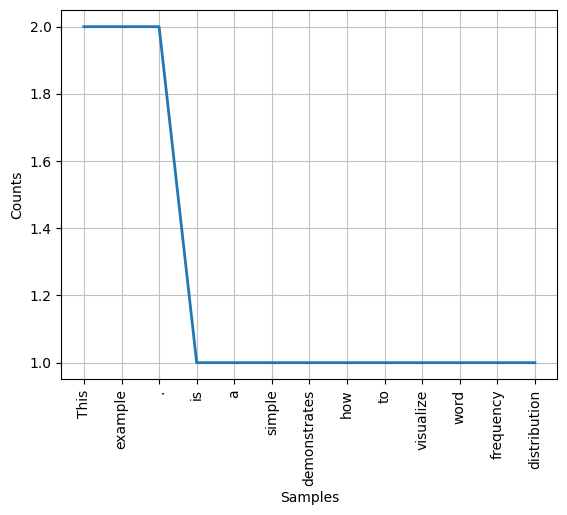

In [21]:
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download necessary NLTK datasets (run this if not downloaded already)
nltk.download('punkt')

# Sample text (can replace with your own sentence)
text = "This is a simple example. This example demonstrates how to visualize word frequency distribution."

# Tokenize the text into words
tokens = word_tokenize(text)

# Generate the frequency distribution of words
freq_dist = FreqDist(tokens)

# Plot the frequency distribution
freq_dist.plot(cumulative=False)
plt.show()
